### Getting started

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import maria 
from astropy.io import fits

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [20]:
map_file     = "../../../maps/tsz.fits"
hudl          = fits.open(map_file)
map_image     = hudl[0].data
*_, map_nx, map_ny = map_image.shape
new_map  = np.zeros((2,1000,1000))
new_map[0] = map_image
new_map[1] = map_image
print(new_map.shape)
_ = new_map.reshape(-1, map_nx, map_ny)
_.shape


(2, 1000, 1000)


(2, 1000, 1000)

In [3]:
from maria import Simulation

sim = Simulation(

    array    = 'AtLAST',
    pointing = 'DAISY_2deg',
    site     = 'APEX',
        
    integration_time = 600,         # seconds
    pointing_center = (4, 10.5),    # degrees
    pointing_frame  = "ra_dec",     # frame
    pointing_throws = (1., 1.),

    atm_model = "linear_angular",
    quantiles = {'column_water_vapor' : 0.5},

    map_file     = "../../../maps/tsz.fits",
    map_position = (4, 10.5),
    map_units    = 'Jy/pixel',                 # Kelvin Rayleigh Jeans (KRJ) or Jy/pixel 
    inbright     = -5.37 * 1e3 * 0.000113,     # In units of key units 
    incell       = 0.5 / 1000,                  # degree

)

Computing weights: 100%|██████████| 4/4 [00:00<00:00, 37.90it/s]


In [21]:
sim.array

NameError: name 'sim' is not defined

In [4]:
sim.site.altitude

5064

In [18]:
dir(sim.atm_sim.weather)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'altitude',
 'azdft_binned',
 'azdft_freq',
 'azdft_params',
 'boundary_layer_dissapation_rate',
 'boundary_layer_height',
 'cloud_cover',
 'column_ice_water',
 'column_liquid_water',
 'column_ozone',
 'column_rain_water',
 'column_snow_water',
 'column_water_vapor',
 'day_hour',
 'day_hour_edge_index',
 'day_hour_edge_points',
 'dew_point',
 'diurnal',
 'divergence',
 'eastward_gravity_wave_surface_stress',
 'eastward_turbulent_surface_stress',
 'eigenmodes',
 'generate',
 'geopotential',
 'high_cloud_cover',
 'ice_water',
 'k_index',
 'label_sources',
 'labels',
 'layer_index',
 'levels',
 'liquid_water',
 'low_cloud_co

In [15]:
tod = sim.run()

Sampling layers: 100%|█████████████████████████████████████████████████████████████████████████████████| 4/4 [01:04<00:00, 16.20s/it]


In [4]:

tods = []

for i in range(4):

    tod = sim.run()
    
    tods.append(tod)


KeyboardInterrupt



In [16]:
from maria import mappers

mapper = mappers.RawBinMapper(resolution=np.radians(0.1/60))

mapper.add_tods(tod)

mapper.run()

/Users/tom/Desktop/maria/maria/mappers.py:115: RuntimeWarning: invalid value encountered in divide
  self.maps[band] = self.map_sums[band] / self.map_cnts[band]


/var/folders/8f/94fgpf0x5sv7zkd75r4sr50r0000gr/T/ipykernel_34010/1659334568.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(mapper.map_sums["f145"] / mapper.map_cnts["f145"])


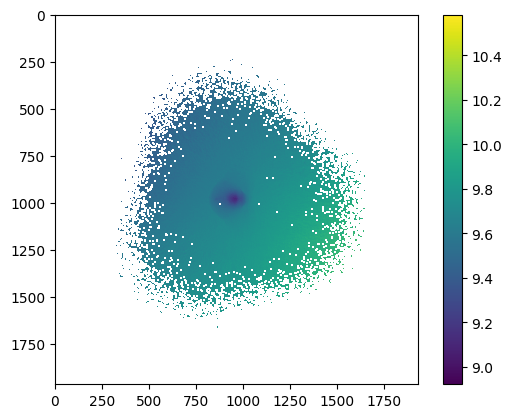

In [17]:
plt.imshow(mapper.map_sums["f145"] / mapper.map_cnts["f145"])
plt.colorbar()

In [3]:
#sim.array.band_width

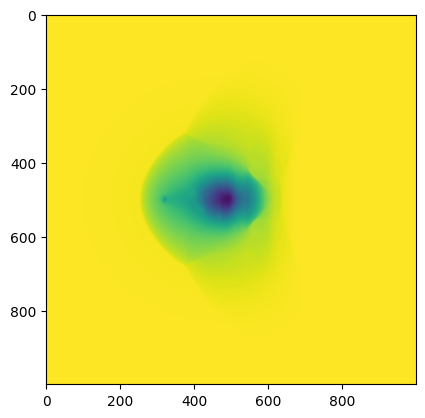

In [4]:
plt.imshow(sim.map_sim.map_data["images"][0])

In [70]:
tod = sim.run()

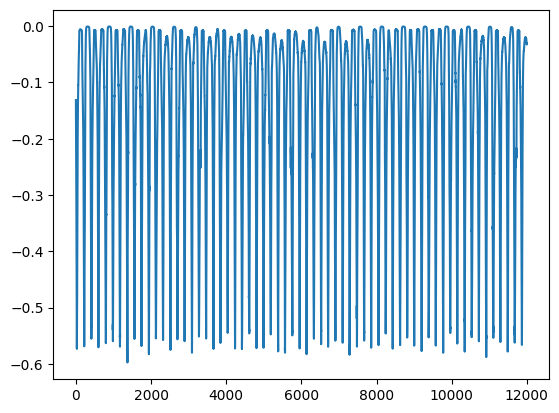

In [71]:
plt.plot(sim.map_sim.map_samples[0,0])

In [72]:
plt.plot(sim.map_sim.AZ[0], sim.map_sim.EL[0])

AttributeError: 'MapSimulation' object has no attribute 'AZ'

In [73]:
map_file = "../../../maps/tsz.fits"

from astropy.io import fits
hudl = fits.open(map_file)



In [74]:
hudl[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1000                                                  
NAXIS2  =                 1000                                                  
EXTEND  =                    T                                                  
EXTNAME = 'SZY     '           / extension name                                 
BTYPE   = 'szy     '                                                            
BUNIT   = 'dimensionless'                                                       
LUNIT   =                  1.0 / [kpc]                                          
TUNIT   =           3.0856E+16 / [s]                                            
MUNIT   =    10002937715.45355 / [Msun]                                         
VUNIT   =             100000

In order to construct a model, we need some ingredients.

The first ingredient is the array, which entirely defines the telescope. The Array object contains all the information about detector offsets, baselines, frequencies, and more, as well as apertures and observational constraints on the instrument.

We can load one of `maria`'s predefined arrays ([MUSTANG-2](https://greenbankobservatory.org/science/gbt-observers/mustang-2/)) 

In [23]:
m2 = maria.get_array("MUSTANG-2")
m2.description

''

and plot the detector offsets:

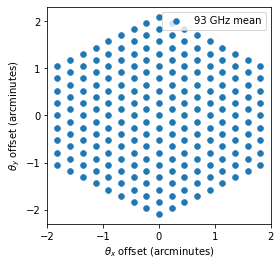

In [24]:


plt.figure(figsize=(4, 4))

for uband in m2.ubands:

    band_mask = m2.band == uband

    
    plt.scatter(60 * np.degrees(m2.sky_x[band_mask]), 
                60 * np.degrees(m2.sky_y[band_mask]),
                label=f'{int(uband[1:])} GHz mean', lw=5e-1)

plt.xlabel(r'$\theta_x$ offset (arcminutes)')
plt.ylabel(r'$\theta_y$ offset (arcminutes)')
plt.legend()

The second ingredient is the pointing, which determines where and how the telescope moves, and how fast it samples. 

We can loading a default scan with a two-degree radius from `maria`:

In [36]:
daisy_scan = maria.get_pointing("DAISY_2deg_4ra_10dec_600s", coord_throws=[5/60, 5/60])
daisy_scan.description

''

Text(0, 0.5, 'Dec. (degrees)')

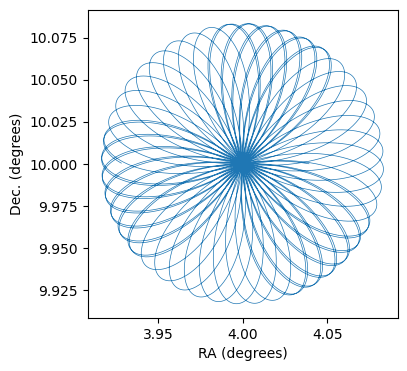

In [37]:
plt.figure(figsize=(4,4))

plt.plot(np.degrees(daisy_scan.ra), 
         np.degrees(daisy_scan.dec),
         lw=5e-1)

plt.xlabel(r'RA (degrees)')
plt.ylabel(r'Dec. (degrees)')

The last ingredient is the site, which determines the translation between local coordinates and sky coordinates. It also determines the weather parameters that go into the atmospheric simulation. 

Loading the Green Bank Telescope site from `maria`:

In [38]:
green_bank = maria.get_site("GBT")
green_bank.description

'Green Bank Telescope'

We can combine these objects by passing them to one of `maria`'s models. On construction, the simulation is initialized:

In [39]:
sim = maria.Simulation(array=m2, pointing=daisy_scan, site=green_bank)

Computing weights: 100%|██████████| 4/4 [00:00<00:00, 75.96it/s]


This also computes things which depend on multiple inputs ()



Text(0, 0.5, 'elevation (degrees)')

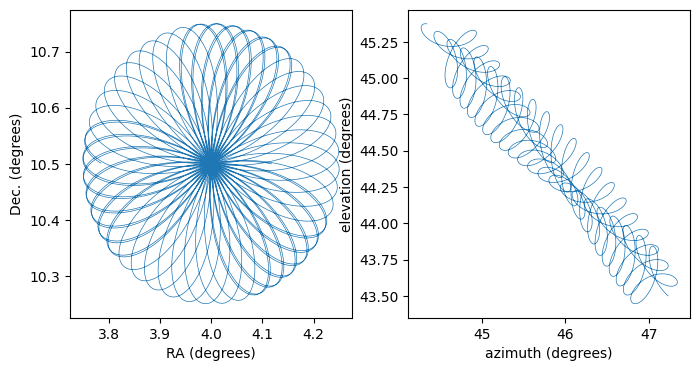

In [75]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

axes[0].plot(np.degrees(sim.pointing.ra), 
             np.degrees(sim.pointing.dec),
             lw=5e-1)

axes[0].set_xlabel(r'RA (degrees)')
axes[0].set_ylabel(r'Dec. (degrees)')

axes[1].plot(np.degrees(sim.pointing.az), 
             np.degrees(sim.pointing.el),
             lw=5e-1)

axes[1].set_xlabel(r'azimuth (degrees)')
axes[1].set_ylabel(r'elevation (degrees)')

/var/folders/8f/94fgpf0x5sv7zkd75r4sr50r0000gr/T/ipykernel_34010/2980830945.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(mapper.map_sums["f093"] / mapper.map_cnts["f093"])


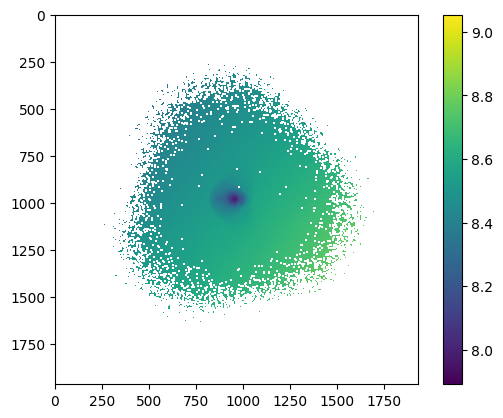

In [18]:
plt.imshow(mapper.map_sums["f093"] / mapper.map_cnts["f093"])
plt.colorbar()

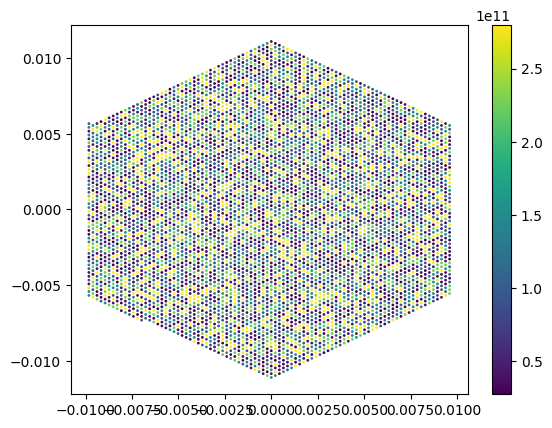

In [19]:
plt.scatter(sim.array.sky_x, 
            sim.array.sky_y, 
            c=sim.array.band_center,
            s=1)
plt.colorbar()

In [79]:
plt.scatter(sim.map_sim.X[0], sim.map_sim.X[0])

array([[ 0.00182366,  0.00176109,  0.00169795, ..., -0.00395852,
        -0.00392428, -0.00388893],
       [ 0.00103526,  0.00097269,  0.00090953, ..., -0.00475433,
        -0.00472009, -0.00468473],
       [ 0.00159217,  0.00152957,  0.00146638, ..., -0.00422355,
        -0.00418928, -0.0041539 ],
       ...,
       [ 0.00840576,  0.00834359,  0.00828083, ...,  0.00293665,
         0.00297064,  0.00300573],
       [ 0.00784883,  0.00778669,  0.00772397, ...,  0.00240588,
         0.00243984,  0.00247491],
       [ 0.00729191,  0.0072298 ,  0.00716711, ...,  0.00187511,
         0.00190905,  0.0019441 ]])

In [31]:
sim.atm_sim

/var/folders/8f/94fgpf0x5sv7zkd75r4sr50r0000gr/T/ipykernel_30868/2338789751.py:3: RuntimeWarning: invalid value encountered in divide
  mapper.map_sums["f093"] / mapper.map_cnts["f093"])


TypeError: Dimensions of C (107, 101) are incompatible with X (108) and/or Y (102); see help(pcolormesh)

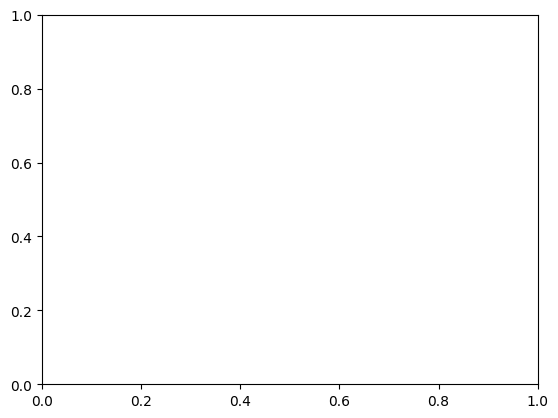

In [64]:
plt.pcolormesh(np.degrees(mapper.ra_bins), 
               np.degrees(mapper.dec_bins), 
               mapper.map_sums["f093"] / mapper.map_cnts["f093"])

plt.colorbar()

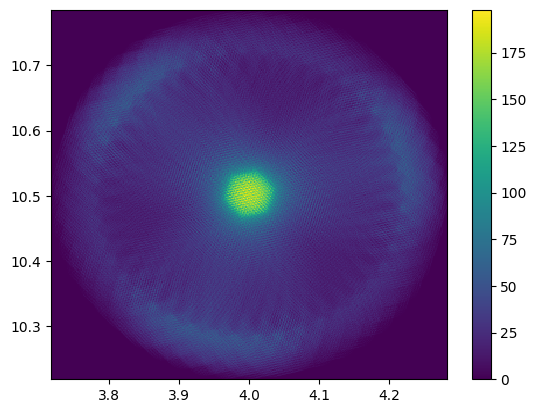

In [16]:
plt.pcolormesh(np.degrees(mapper.ra_bins), 
               np.degrees(mapper.dec_bins), 
               mapper.map_cnts["f093"])

plt.colorbar()

The simulated time-ordered data is stored `lam.temperature`, which has shape `(n_freqs, n_dets, n_samples)`. Plotting the output as fluctuations:

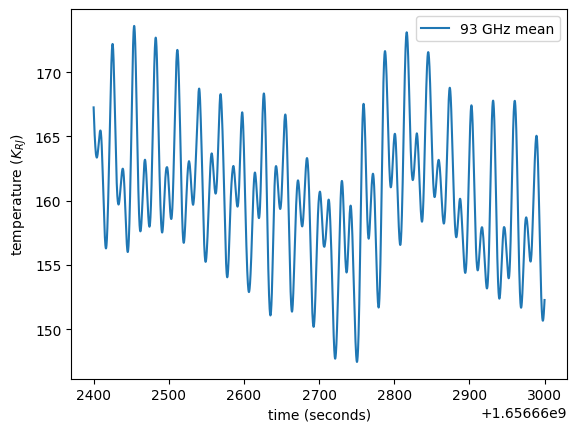

In [15]:
for uib, uband in enumerate(np.unique(tod.detectors.band)):

    band_mask = tod.detectors.band == uband
    band_mean = tod.data[band_mask].mean(axis=0)
    plt.plot(tod.time, band_mean, label=f'{int(uband[1:])} GHz mean')

plt.xlabel('time (seconds)')
plt.ylabel(r'temperature ($K_{RJ}$)')
plt.legend()